In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression, SelectPercentile
from sklearn.grid_search import GridSearchCV
import pickle
np.random.seed(42)


%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


ss = StandardScaler()
lr = LinearRegression()
lasso = Lasso()

df = pd.read_csv('../Data/train.csv')
kaggle = pd.read_csv('../Data/test.csv', index_col = 'Id')

df.drop(labels =182, axis = 0, inplace=True)

df.drop(labels =1554, axis = 0, inplace=True)

df.columns

df_num_corr = df.corr()['SalePrice']
df_num_corr[abs(df_num_corr) > 0.5]

df_int = df.select_dtypes(include = ['object'])
kaggle_int = kaggle.select_dtypes(include = ['object'])

df_int.shape

df_int_d = pd.get_dummies(df_int, drop_first=True)
kaggle_int_d = pd.get_dummies(kaggle_int, drop_first=True)

df_int_d.shape

DROP: 

Pool QC
Garage Cond or Qual
Exter Qual or Exter Cond
Condition 1
Condition 2
TotRms Abvgrd
Lot Frontage
Garage Cars
Total Bsmt Area

Simplify:
Electrical


df.drop(['PID', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'BsmtFin SF 2', 'Garage Cars', 'Lot Frontage'], axis=1, inplace=True)

kaggle.drop(['PID', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'BsmtFin SF 2'], axis=1, inplace=True)

df.shape

df_con = pd.concat((df, df_int_d), axis=1)
df_con.fillna(0, inplace=True)
kaggle_con = pd.concat((kaggle, kaggle_int_d), axis=1)
kaggle_con.fillna(0, inplace=True)

y = df['SalePrice'].values
X = df_con.drop(['SalePrice'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
ss = StandardScaler()

from sklearn.feature_selection import variance_threshold

In [2]:
X_train = pd.read_pickle("../Data/X_train.pkl")
X_test = pd.read_pickle("../Data/X_test.pkl")
y_train = pd.read_pickle("../Data/y_train.pkl")
y_test = pd.read_pickle("../Data/y_test.pkl")

In [3]:
pipe = Pipeline([
    ('var_thresh', VarianceThreshold(.05)),
    ('ss', StandardScaler()),
    ('kbest', SelectKBest(f_regression, k=5)),
#    ('kpercentile', SelectPercentile()),
    ('lasso', Lasso())
])

In [4]:
#pipe.fit(X_train, y_train)

In [5]:
#pipe.score(X_train, y_train)

In [6]:
#pipe.score(X_test, y_test)

In [32]:
params = {
    'var_thresh__threshold': [0, .05, .1, .15],
    'kbest__k': [9, 15, 30],
    'lasso__alpha': np.logspace(-3, 3, 7)
}

In [33]:
gs = GridSearchCV(pipe, params)

In [34]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('var_thresh', VarianceThreshold(threshold=0.05)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest', SelectKBest(k=5, score_func=<function f_regression at 0x1a088dc730>)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'var_thresh__threshold': [0, 0.05, 0.1, 0.15], 'kbest__k': [9, 15, 30], 'lasso__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [35]:
gs.score(X_train, y_train)

0.839201038385739

In [36]:
gs.score(X_test, y_test)

0.8811855649132956

In [37]:
gs.best_params_

{'kbest__k': 30, 'lasso__alpha': 100.0, 'var_thresh__threshold': 0}

In [38]:
#gs.best_estimator_.named_steps['var_thresh'].get_support()

In [39]:
#gs.best_estimator_.named_steps['kbest'].get_support()

In [15]:
#gs.best_estimator_.named_steps['lasso'].coef_

In [40]:
gs.best_estimator_.named_steps['lasso'].intercept_

180730.78371335505

In [41]:
with open('../assets/columns.pkl', 'rb') as f:
    columns = pickle.load(f)

In [42]:
betas = pd.DataFrame(
    gs.best_estimator_.named_steps['lasso'].coef_,          
    index = X_train.columns[gs.best_estimator_.named_steps['var_thresh'].get_support()]
    [gs.best_estimator_.named_steps['kbest'].get_support()], 
    columns=['weight'])

In [43]:
betas['abs_w'] = betas.weight.abs()

weights = betas.sort_values('abs_w', ascending=False)['weight'].head(30)

labels = weights.index

beta_0 = gs.best_estimator_.named_steps['lasso'].intercept_

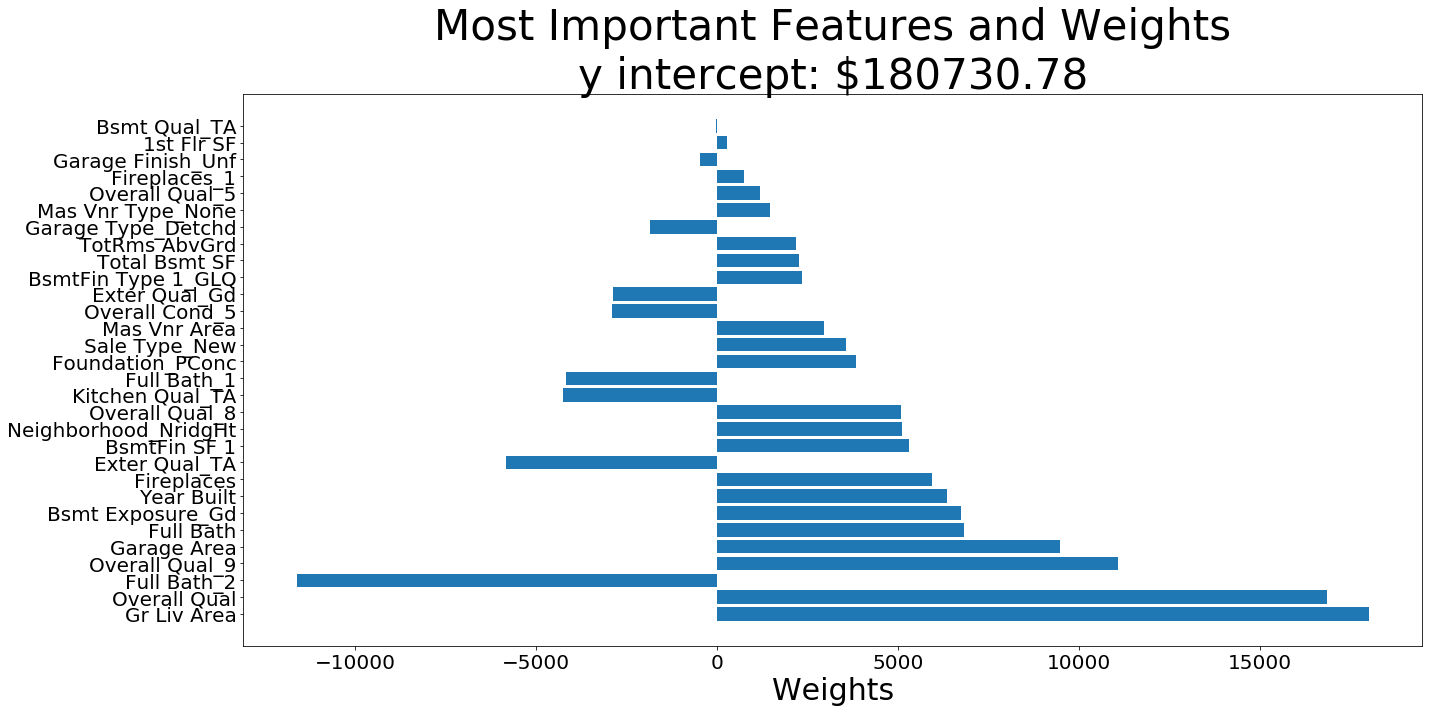

In [44]:
plt.figure(figsize=(20,10))
plt.barh(labels, weights)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Weights', fontsize=30)
plt.title(f'Most Important Features and Weights\ny intercept: ${beta_0:0.02f}', fontsize=42)
plt.tight_layout()

In [45]:
kaggle = pd.read_csv('../Data/test.csv', index_col = 'Id')
kaggle_int = kaggle.select_dtypes(include = ['object'])
kaggle_int_d = pd.get_dummies(kaggle_int, drop_first=True)
kaggle.drop(['PID', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'BsmtFin SF 2'], axis=1, inplace=True)
kaggle_con = pd.concat((kaggle, kaggle_int_d), axis=1)
kaggle_con.fillna(0, inplace=True)

In [46]:
# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( kaggle_con.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    kaggle_con[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
kaggle_con = kaggle_con[X_train.columns]

In [47]:
columns = X_train.columns

kaggle_con = kaggle_con[columns]

preds = gs.predict(kaggle_con)

In [48]:
preds = gs.predict(kaggle_con)

In [49]:
submission = pd.DataFrame(preds, index=kaggle.index, columns=['SalePrice'])

In [50]:
submission.sort_index(inplace=True)

In [51]:
submission.head()

,SalePrice
Id,
2,137701.569560
4,262097.299515
6,217409.813579
7,237556.938665
17,226340.882835


In [30]:
submission.to_csv('../Data/numeric_only_lasso.csv')

In [31]:
!head ../Data/numeric_only_lasso.csv

Id,SalePrice
2,136201.62853592
4,265500.23534781823
6,217422.67790650233
7,237243.72577176744
17,225275.43709957472
18,296725.1353598743
22,240631.25803921625
27,121637.95114148463
31,128820.15880639642
